## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from tqdm import tqdm

from main import Choleski_sla, Choleski_numpy


## Matrice

A: [[ 3. -1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [-1.  3. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  3. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  3. -1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  3. -1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1.  3. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  3. -1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0. -1.  3. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  3. -1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0. -1.  3.]] 

b: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]



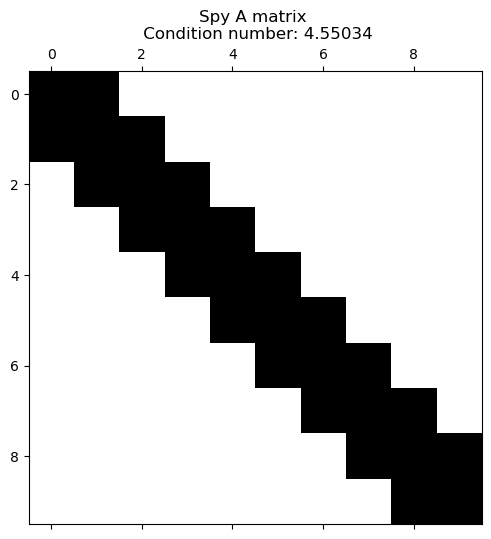

In [2]:
def create_test_matrix(dim = 10):

    A = np.diag(np.array([3.] * dim))
    for i, j in zip(range(1, dim), range(0, dim-1)):
        A[i, j] = -1
        A[j, i] = -1

    b = np.array([1.] * dim)

    return A, b

##########
#####
##########

A, b = create_test_matrix(dim = 10)
print(f'A: {A} \n')
print(f'b: {b}')

print()

plt.figure(figsize = (6, 6), dpi = 100)
plt.spy(
    A, 
    precision = 0, 
    marker = None, 
    markersize = None
)
plt.title(f'Spy A matrix \n Condition number: {round(np.linalg.cond(A), 5)}')
plt.show()

## Benchmarks

In [3]:
# getting matrix
A, b = create_test_matrix(dim = 100)

# sla_sol = Choleski_sla(A, b)
sla_res = []
np_res = []

runs = 50

for i in tqdm(range(runs)):
    sla_res.append(Choleski_sla(A, b))
    np_res.append(Choleski_numpy(A, b))


100%|██████████| 50/50 [00:00<00:00, 634.65it/s]


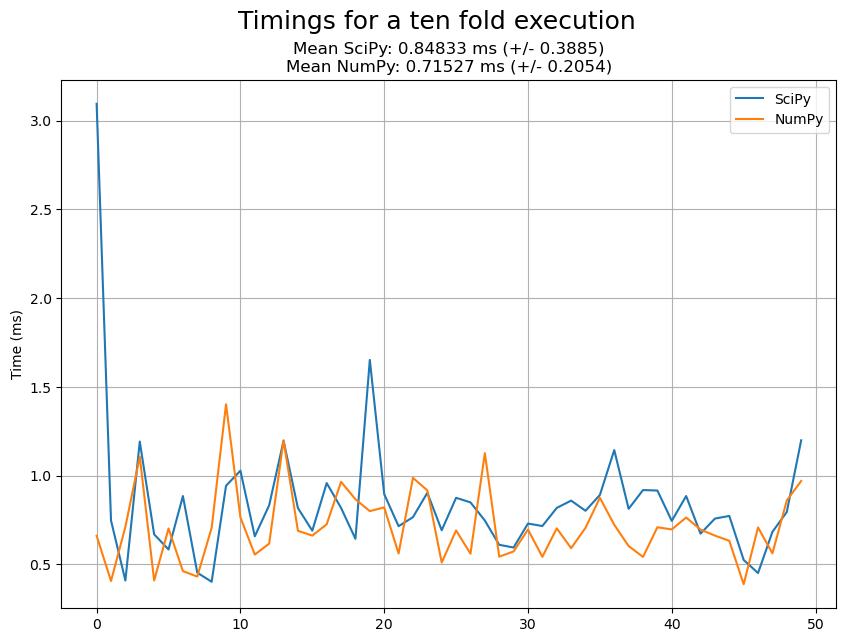

In [5]:
timings_sla = [ele['time']*1000 for ele in sla_res]
timings_np = [ele['time']*1000 for ele in np_res]

plt.figure(figsize = (10, 7), dpi = 100)
plt.plot(timings_sla, label = 'SciPy')
plt.plot(timings_np, label = 'NumPy')
plt.grid()
plt.legend()
plt.ylabel('Time (ms)')
plt.suptitle('Timings for a ten fold execution', fontsize = 18)
plt.title(f'Mean SciPy: {round(np.mean(timings_sla), 5)} ms (+/- {round(np.std(timings_sla), 4)})\nMean NumPy: {round(np.mean(timings_np), 5)} ms (+/- {round(np.std(timings_np), 4)})')
plt.show()


## Test vari

In [71]:
# provare a fare grafico andamento del tempo di calcolo aumentando la grandezza della matrice
# in pratica: asse x = dimensione matrice, asse y = tempo impiegato
# ogni test per ogni dimensione deve effettuare una prova di 10 volte prendendo quindi la media e la sua std

sla_res_dim = {}
sla_res_np = {}

dim_max = 10000
step = 100

for dim in tqdm(range(0, dim_max + 1, step)):
    A, b = create_test_matrix(dim = dim)
    sla_res_dim[dim] = []
    sla_res_np[dim] = []
    for t in range(10):
        sla_res_dim[dim].append(Choleski_sla(A, b))
        sla_res_np[dim].append(Choleski_numpy(A, b))


100%|██████████| 101/101 [34:30<00:00, 20.50s/it]


In [72]:
avgs_sla = []
stds_sla = []
avgs_np = []
stds_np = []


for dim in range(0, dim_max + 1, step):
    avgs_sla.append(np.mean([ele['time'] for ele in sla_res_dim[dim]]))
    avgs_np.append(np.mean([ele['time'] for ele in sla_res_np[dim]]))
    stds_sla.append(np.std([ele['time'] for ele in sla_res_dim[dim]]))
    stds_np.append(np.std([ele['time'] for ele in sla_res_np[dim]]))


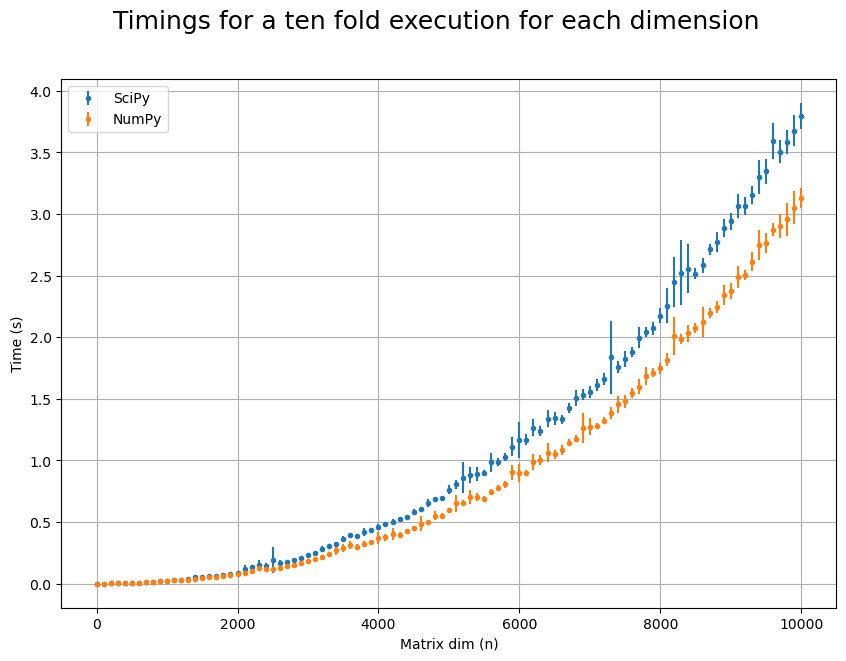

In [76]:

plt.figure(figsize = (10, 7), dpi = 100)
# plt.plot(avgs_sla, label = 'SciPy')
# plt.plot(avgs_np, label = 'numPy')
plt.errorbar(range(0, dim_max + 1, step), avgs_sla, stds_sla, linestyle='None', marker='.', label = 'SciPy')
plt.errorbar(range(0, dim_max + 1, step), avgs_np, stds_np, linestyle='None', marker='.', label = 'NumPy')
plt.ylabel('Time (s)')
plt.xlabel('Matrix dim (n)')
plt.suptitle('Timings for a ten fold execution for each dimension', fontsize = 18)
# plt.title(f'Mean SciPy: {round(np.mean(timings_sla), 5)} ms (+/- {round(np.std(timings_sla), 4)})\nMean NumPy: {round(np.mean(timings_np), 5)} ms (+/- {round(np.std(timings_np), 4)})')
plt.legend()
plt.grid()
plt.show()


In [85]:
import pandas as pd

tmp_df = {}
tmp_df['dimension'] = [ele for ele in range(0, dim_max + 1, step)]
tmp_df['avgs_sla'] = avgs_sla
tmp_df['stds_sla'] = stds_sla
tmp_df['avgs_np'] = avgs_np
tmp_df['stds_np'] = stds_np

df = pd.DataFrame.from_dict(tmp_df)
df.to_csv('./Ten_fold_execution_for_each_dimension.csv')


In [83]:
sla_res_dim[10000]

[{'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.9534788131713867},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.970659017562866},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.737226963043213},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.6935343742370605},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.665699005126953},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.8905768394470215},
 {'result': array([0.61803399, 0.85410197, 0.94427191, ..., 0.94427191, 0.85410197,
         0.61803399]),
  'time': 3.823982000350952},
 {'result': array([0.61803399, 0.85410

Suggerimenti random: unica cosa da controllare per la 'qualità' della matrice è il numero di condizionamento (calcolato preferibilmente su matlab che è sicuramente più preciso). Per le misure di performance è consigliabile usare la norma a 2 (che è calcolata come il massimo dell'autovalore a differenza di quella infinito dove la matrice deve essere invertita e potrbbe essere quindi introdotto un errore)

# Inizio benchmark

### Componenti

In [6]:
# imports
import time
import tracemalloc
import numpy as np
from scipy.io import mmread
from scipy.sparse.linalg import norm
from sksparse.cholmod import cholesky;
from sklearn.utils.validation import check_symmetric;
from tqdm import tqdm

In [8]:
# path (or folder) of the matrix
path = './matrix/'

"""
La funzione permette il calcolo dell'errore relativo e del picco di memoria usato durante
la risoluzione della matrice stessa
"""
def compute_cholesky_relative_error_and_memory(matrix_name):
    relative_error = 0
    memory_peak = 0
    try:
        # Inizio il tracciamento della memoria
        start_track_memory()
        # Leggo la matrice
        A = mmread(path + matrix_name)
        # Check symmetry of the matrix
        check_symmetric(A, raise_exception = True)

        # a solution
        xe = np.ones((A.shape[0], 1))
        b = A * xe

        # cholesky
        factor = cholesky(A)
        x = factor(b)

        # salvo il picco di memoria
        memory_peak = convert_size(end_track_memory())
        relative_error = np.linalg.norm(x - xe) / np.linalg.norm(xe)
    except ValueError:
        # there is a problem
        print(ValueError)
    finally:
        return {
            "relative_error": relative_error,
            "memory_peak": memory_peak
        }


"""
La funzione permette il calcolo del tempo impiegato durante la lettura e durante
la risoluzione della matrice stessa
"""
def compute_cholesky_read_and_solve_time(matrix_name):
    read_time = 0
    solve_time = 0
    try:
        # Starting timer
        read_time = time.time()
        # Reading
        A = mmread(path + matrix_name)
        # Lapping timer
        read_time = time.time() - read_time

        # solving
        check_symmetric(A, raise_exception = True)
        xe = np.ones((A.shape[0], 1))
        b = A * xe

        # stopping timer
        solve_time = time.time()
        factor = cholesky(A)
        x = factor(b)
        solve_time = time.time() - solve_time
    except ValueError:
        print(ValueError)
    finally:
        return {
            "read_time": read_time,
            "solve_time": solve_time
        }



def cholesky_times(matrix_name):
    print(f'{matrix_name}: \t: ', end = '')
    read_times = []
    solve_times = []
    for i in tqdm(range(0, 5)):
        result = compute_cholesky_read_and_solve_time(matrix_name)
        read_times.append(str(result["read_time"]))
        solve_times.append(str(result["solve_time"]))
        # print(i) # for debug
    return {
        "read_times": ";".join(read_times).replace(".", ","),
        "solve_times": ";".join(solve_times).replace(".", ","),
    }





def compute_cholesky(matrix_name):
    
    try:
        result1 = compute_cholesky_relative_error_and_memory(matrix_name)
        result2 = cholesky_times(matrix_name)
        file = open("results.txt", "a")
        file.write(str({
        "matrix": matrix_name,
        "relative_error": str(result1["relative_error"]).replace(".", ","),
        "memory_peak": str(result1["memory_peak"]).replace(".", ","),
        "read_times": result2["read_times"],
        "solve_times": result2["solve_times"]
        }) + "\n")
        file.close()
    except ValueError:
        print(ValueError)

def start_track_memory():
    tracemalloc.start()

def end_track_memory():
    _, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak

def convert_size(size_bytes):
    r = float(size_bytes)
    return r/(1024*1024)



#### Executing

In [9]:

compute_cholesky("ex15.mtx")
compute_cholesky("shallow_water1.mtx")
compute_cholesky("parabolic_fem.mtx")
compute_cholesky("apache2.mtx")
compute_cholesky("G3_circuit.mtx")
compute_cholesky("cfd1.mtx")
compute_cholesky("cfd2.mtx")
compute_cholesky("Flan_1565.mtx")
compute_cholesky("StocF-1465.mtx")

/tmp/ipykernel_34407/3308174115.py:24: CholmodTypeConversionWarning: converting matrix of class coo_matrix to CSC format
  factor = cholesky(A)


ex15.mtx: 	: 

  0%|          | 0/5 [00:00<?, ?it/s]/tmp/ipykernel_34407/3308174115.py:62: CholmodTypeConversionWarning: converting matrix of class coo_matrix to CSC format
  factor = cholesky(A)
100%|██████████| 5/5 [00:00<00:00, 13.90it/s]


shallow_water1.mtx: 	: 

100%|██████████| 5/5 [00:01<00:00,  3.10it/s]


parabolic_fem.mtx: 	: 

100%|██████████| 5/5 [00:17<00:00,  3.53s/it]


apache2.mtx: 	: 

100%|██████████| 5/5 [00:46<00:00,  9.25s/it]


G3_circuit.mtx: 	: 

100%|██████████| 5/5 [01:09<00:00, 13.86s/it]


cfd1.mtx: 	: 

100%|██████████| 5/5 [00:08<00:00,  1.76s/it]


cfd2.mtx: 	: 

100%|██████████| 5/5 [00:15<00:00,  3.02s/it]


Flan_1565.mtx: 	: 

100%|██████████| 5/5 [07:58<00:00, 95.68s/it]


StocF-1465.mtx: 	: 

100%|██████████| 5/5 [04:02<00:00, 48.45s/it]
